# PyTorch基础的神经网络

PyTorch实现神经网络，可以直接定义计算图，也可以通过Sequential和Module这两种方式实现

In [1]:
import torch
import numpy as np
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

## Step1-线性模型

### 数据集

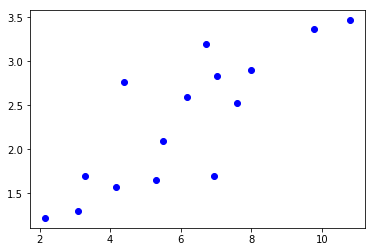

In [2]:
torch.manual_seed(2017)

# 读入数据 x 和 y
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# 画出图像
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_train, y_train, 'bo')

### 构建线性回归模型

In [3]:
# 转换成 Tensor
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

# 定义参数 w 和 b
w = Variable(torch.randn(1), requires_grad=True) # 随机初始化
b = Variable(torch.zeros(1), requires_grad=True) # 使用 0 进行初始化

# 构建线性回归模型
x_train = Variable(x_train)
y_train = Variable(y_train)

def linear_model(x):
    return x * w + b

### 进行训练

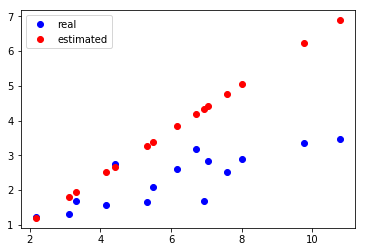

In [4]:
# 训练一次

y_ = linear_model(x_train)

def get_loss(y_, y):
    return torch.mean((y_ - y_train) ** 2)

loss = get_loss(y_, y_train)

# 自动求导
loss.backward()

# 更新一次参数
w.data = w.data - 1e-2 * w.grad.data
b.data = b.data - 1e-2 * b.grad.data

y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

epoch: 0, loss: 3.13577198982
epoch: 1, loss: 0.355088919401
epoch: 2, loss: 0.302954435349
epoch: 3, loss: 0.301319569349
epoch: 4, loss: 0.300622910261
epoch: 5, loss: 0.299946933985
epoch: 6, loss: 0.299274742603
epoch: 7, loss: 0.298606008291
epoch: 8, loss: 0.297940701246
epoch: 9, loss: 0.297278821468


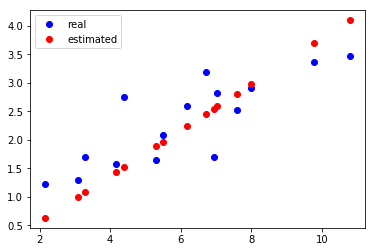

In [5]:
# 训练10次

for e in range(10): # 进行 10 次更新
    y_ = linear_model(x_train)
    loss = get_loss(y_, y_train)
    
    w.grad.zero_() # 记得归零梯度
    b.grad.zero_() # 记得归零梯度
    loss.backward()
    
    w.data = w.data - 1e-2 * w.grad.data # 更新 w
    b.data = b.data - 1e-2 * b.grad.data # 更新 b 
    print('epoch: {}, loss: {}'.format(e, loss.data[0]))

y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

## Step2-逻辑回归模型

In [6]:
# 定义 logistic 回归模型
w = Variable(torch.randn(2, 1), requires_grad=True) 
b = Variable(torch.zeros(1), requires_grad=True)

def logistic_regression(x):
    return F.sigmoid(torch.mm(x, w) + b)

## Step3-Sequential方式构建网络 

In [2]:
# Sequential 实现感知器模型
seq_net = nn.Sequential(
    nn.Linear(10, 1), # PyTorch 中的线性层，wx + b
    #nn.Tanh(),
    #nn.Sigmoid()
    nn.ReLU()
)

In [3]:
w0 = seq_net[0].weight
print(w0)

Parameter containing:
 0.0354  0.1174 -0.1573  0.0447 -0.2378 -0.1630 -0.0975  0.1230  0.0199  0.1185
[torch.FloatTensor of size 1x10]



In [9]:
# Sequential 实现多层感知器
seq_net = nn.Sequential(
    nn.Linear(3, 5), 
    nn.Tanh(),
    nn.Linear(5, 5), 
    nn.Tanh(),
    nn.Linear(5, 5), 
    nn.Tanh(),
    nn.Linear(5, 1)
)

In [10]:
# 序列模块可以通过索引访问每一层

seq_net[0] # 第一层

Linear(in_features=3, out_features=5)

In [11]:
# 打印出第一层的权重

w0 = seq_net[0].weight
print(w0)

Parameter containing:
 0.0083  0.4564 -0.2736
 0.3090  0.2554 -0.4031
-0.1918  0.5299  0.2219
 0.0092  0.5584 -0.0800
 0.5031  0.4449 -0.1051
[torch.FloatTensor of size 5x3]



In [12]:
w2 = seq_net[2].weight
print(w2)

Parameter containing:
 0.1749  0.3940 -0.2080  0.0910  0.1055
 0.4444  0.1110 -0.2116 -0.1449 -0.4116
 0.0874 -0.1681  0.2430 -0.2776  0.0946
 0.0664 -0.1065  0.0233  0.0138 -0.3478
 0.3513 -0.2040  0.1484  0.2933  0.1686
[torch.FloatTensor of size 5x5]



In [13]:
w4 = seq_net[4].weight
print(w4)

Parameter containing:
-0.2908 -0.0966 -0.2009  0.0071  0.4237
 0.2934  0.3061 -0.2951 -0.0222 -0.1600
-0.1250  0.0657 -0.3498  0.3016 -0.1939
-0.4223 -0.0491 -0.2708  0.0756  0.4193
 0.1285  0.1233  0.0527 -0.4045  0.1403
[torch.FloatTensor of size 5x5]



In [14]:
w6 = seq_net[6].weight
print(w6)

Parameter containing:
-0.0276 -0.2694 -0.4035 -0.1831 -0.1520
[torch.FloatTensor of size 1x5]



## Step4-Module方式构建网络

In [4]:
# Module实现多层感知器
class module_net(nn.Module):
    def __init__(self, num_input, num_hidden, num_output):
        super(module_net, self).__init__()
        self.layer0 = nn.Linear(num_input, num_hidden)
        self.layer1 = nn.Tanh()
        self.layer2 = nn.Linear(num_hidden, num_hidden)
        self.layer3 = nn.Tanh()
        self.layer4 = nn.Linear(num_hidden, num_hidden)
        self.layer5 = nn.Tanh()
        self.layer6 = nn.Linear(num_hidden, num_output)
        
    def forward(self, x):
        x = self.layer0(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.layer6(x)
        return x

In [5]:
mo_net = module_net(3, 5, 1)

In [6]:
# 访问模型中的某层可以直接通过名字

# 第一层
w0 = mo_net.layer0
print(w0)

Linear(in_features=3, out_features=5)


In [18]:
# 打印出第一层的权重
print(w0.weight)

Parameter containing:
 0.4480  0.4642 -0.5232
-0.1417 -0.3788  0.5193
 0.3979  0.2646  0.5289
-0.5132 -0.3184  0.4813
-0.3105 -0.1532 -0.0218
[torch.FloatTensor of size 5x3]



## Step5-模型保存与读取

In [19]:
# 将参数和模型保存在一起
torch.save(mo_net, './save_mo_net.pth')

/Library/Python/2.7/site-packages/torch/serialization.py:158: UserWarning: Couldn't retrieve source code for container of type module_net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
